1.88287575977


((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.164745194154, 180921.19589041095, 0.93196656415129864))

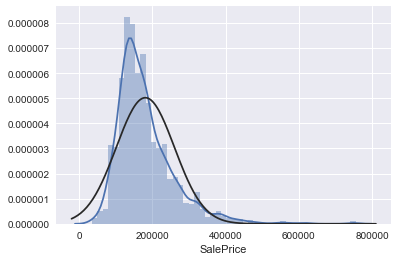

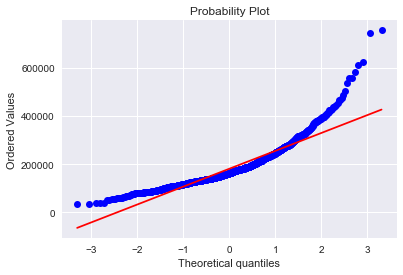

In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
%matplotlib inline

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
full_data = [train, test]

print(train['SalePrice'].skew())
sns.distplot(train['SalePrice'], fit=stats.norm)
fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 4.54282543,  4.54791002,  4.57863921, ...,  5.79588002,
          5.87215627,  5.87794695])),
 (0.17296308919394987, 5.2219789564756276, 0.99537614756366077))

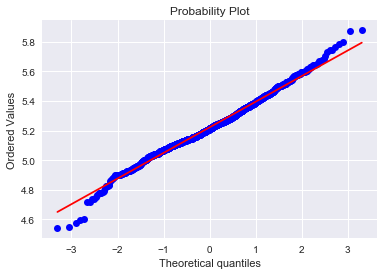

In [12]:
new_sale = train['SalePrice'].apply(math.log10)
stats.probplot(new_sale, plot=plt)

In [13]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Plot with numerical variables

              SalePrice  TotRmsAbvGrd
SalePrice      1.000000      0.533723
TotRmsAbvGrd   0.533723      1.000000


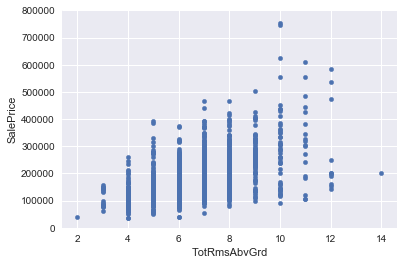

In [14]:
var = 'TotRmsAbvGrd'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))
print(data.corr(method='pearson'))

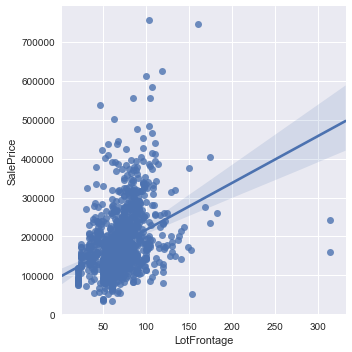

In [15]:
var = 'LotFrontage'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
sns.lmplot(x=var, y='SalePrice', data=data, fit_reg=True)

# Plot with categorical variables

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64
    TotRmsAbvGrd      SalePrice
0              2   39300.000000
1              3  111217.647059
2              4  122844.628866
3              5  141550.749091
4              6  161303.296020
5              7  196666.784195
6              8  213427.529412
7              9  252988.173333
8             10  296279.170213
9             11  318022.000000
10            12  280971.454545
11            14  200000.000000


(-0.5, 11.5, 0, 800000)

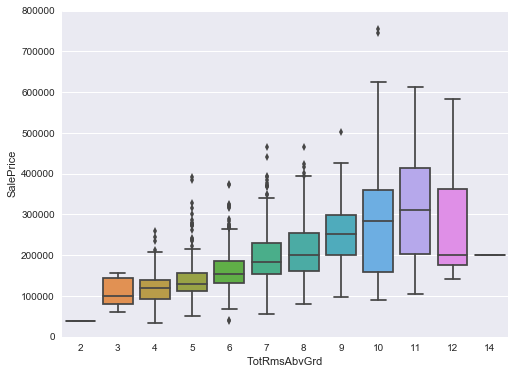

In [16]:
var = 'TotRmsAbvGrd'
print(train[var].value_counts())
print(train[[var,'SalePrice']].groupby([var], as_index=False).mean())
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)

# Look at importance of each variable

            SalePrice  TotalFlrSF
SalePrice    1.000000    0.773625
TotalFlrSF   0.773625    1.000000


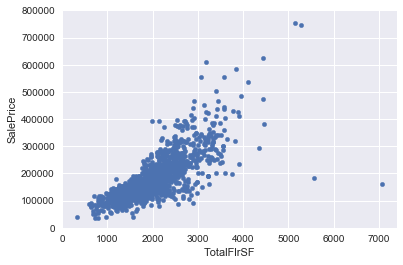

In [17]:
# test total floor
var1 = '1stFlrSF'
var2 = '2ndFlrSF'
train['TotalFlrSF'] = train['GrLivArea'] + train['GarageArea']
test['GarageArea'] = test['GarageArea'].fillna(0.0)
test['TotalFlrSF'] = test['GrLivArea'] + test['GarageArea']

var = 'TotalFlrSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))
print(data.corr(method='pearson'))

# 6 Feature Chosen

In [18]:
feature = ['Neighborhood', 'OverallQual', 'TotalBsmtSF', 'TotRmsAbvGrd', 'TotalFlrSF',\
          'YearBuilt', 'YearRemodAdd', 'OverallCond', 'FullBath', 'Fireplaces']

Id = test['Id']
X_train = train[feature]
Y_train = train['SalePrice']
X_test = test[feature]

In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
Neighborhood    1460 non-null object
OverallQual     1460 non-null int64
TotalBsmtSF     1460 non-null int64
TotRmsAbvGrd    1460 non-null int64
TotalFlrSF      1460 non-null int64
YearBuilt       1460 non-null int64
YearRemodAdd    1460 non-null int64
OverallCond     1460 non-null int64
FullBath        1460 non-null int64
Fireplaces      1460 non-null int64
dtypes: int64(9), object(1)
memory usage: 114.1+ KB


In [20]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 10 columns):
Neighborhood    1459 non-null object
OverallQual     1459 non-null int64
TotalBsmtSF     1458 non-null float64
TotRmsAbvGrd    1459 non-null int64
TotalFlrSF      1459 non-null float64
YearBuilt       1459 non-null int64
YearRemodAdd    1459 non-null int64
OverallCond     1459 non-null int64
FullBath        1459 non-null int64
Fireplaces      1459 non-null int64
dtypes: float64(2), int64(7), object(1)
memory usage: 114.1+ KB


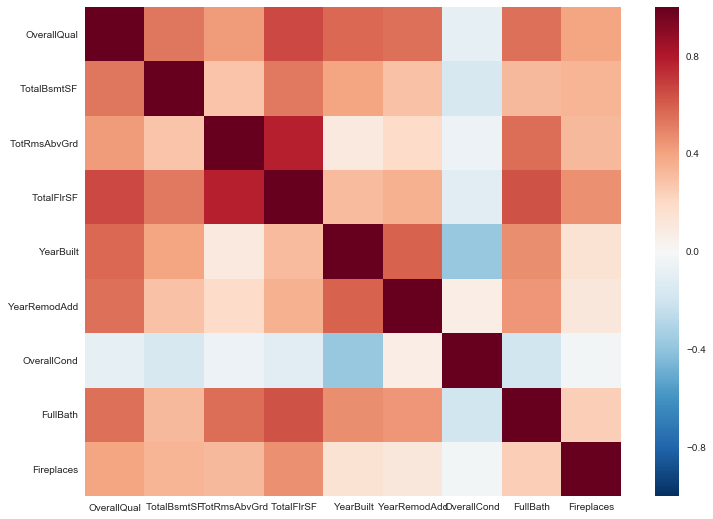

In [21]:
cormap = X_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(cormap)

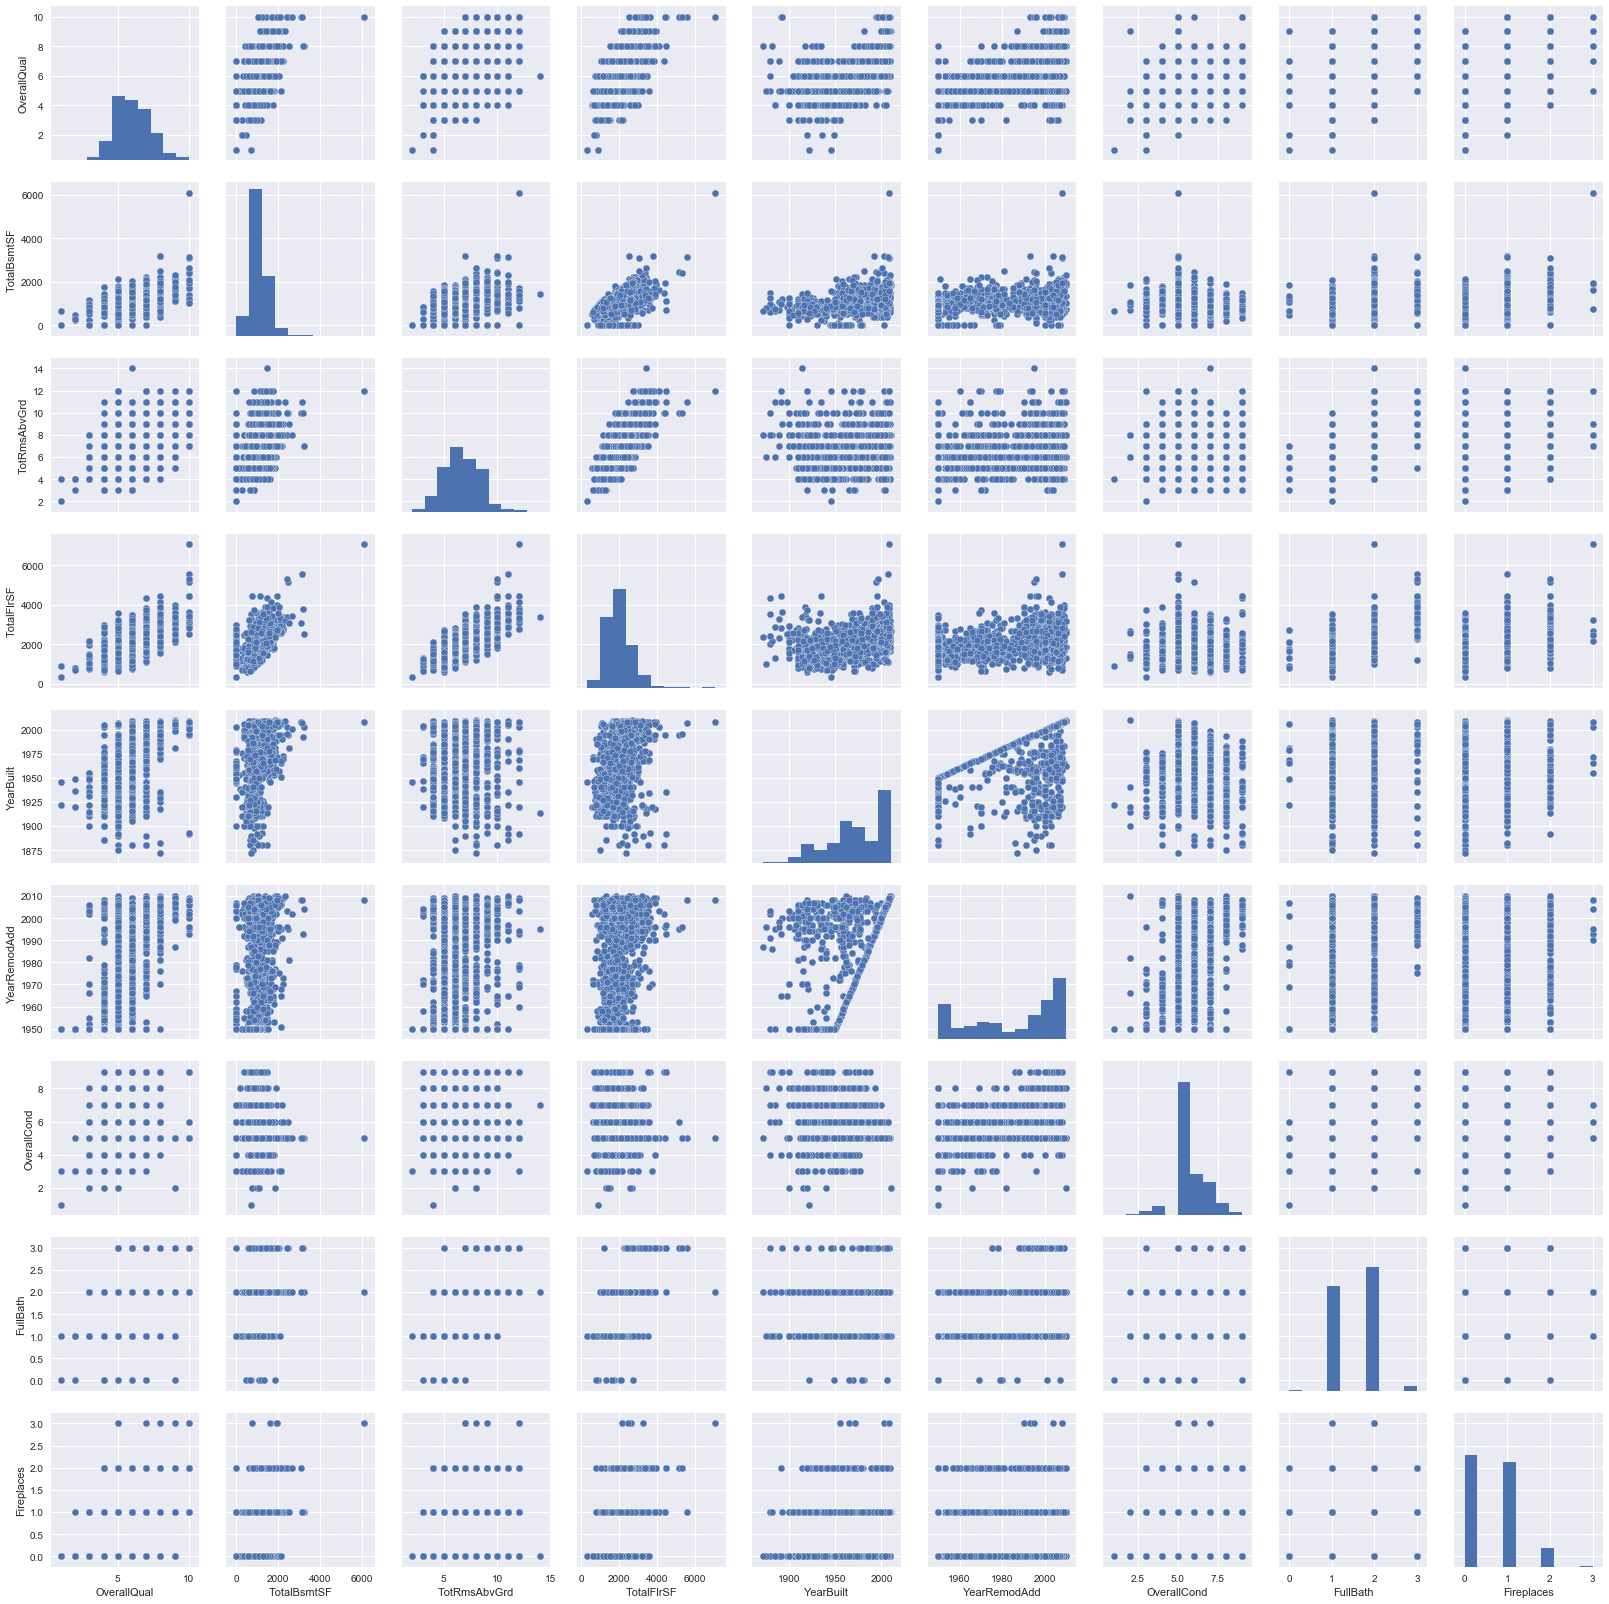

In [23]:
# Pair plot
sns.set()
sns.pairplot(X_train, size=2.5)

# Two missing data in test

In [11]:
ave = test['TotalBsmtSF'].mean()
X_test['TotalBsmtSF'] = X_test['TotalBsmtSF'].fillna(ave)
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 10 columns):
Neighborhood    1459 non-null object
OverallQual     1459 non-null int64
TotalBsmtSF     1459 non-null float64
TotRmsAbvGrd    1459 non-null int64
TotalFlrSF      1459 non-null float64
YearBuilt       1459 non-null int64
YearRemodAdd    1459 non-null int64
OverallCond     1459 non-null int64
FullBath        1459 non-null int64
Fireplaces      1459 non-null int64
dtypes: float64(2), int64(7), object(1)
memory usage: 114.1+ KB
None


/Users/bai/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
# Remove outliers
X_train.head()
X_train.sort_values(by = 'TotalFlrSF', ascending = False).head()
X_train = X_train.drop(1298)
X_train = X_train.drop(523)
Y_train = Y_train.drop(1298)
Y_train = Y_train.drop(523)
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
Y_train = Y_train.apply(math.log10)
columns = X_train.columns
print(columns)

Index(['OverallQual', 'TotalBsmtSF', 'TotRmsAbvGrd', 'TotalFlrSF', 'YearBuilt',
       'YearRemodAdd', 'OverallCond', 'FullBath', 'Fireplaces',
       'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker'],
      dtype='object')


In [13]:
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values

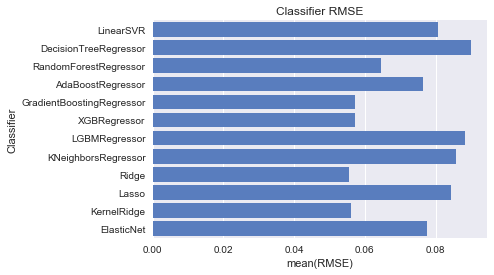

In [14]:
-
        

# Predict

In [15]:
clf = XGBRegressor(n_estimators=2600, learning_rate=0.01, eval_metric='rmse', max_depth=3, min_child_weight=6,\
                  subsample=0.9, colsample_bytree=0.5, reg_alpha=1e-5)
clf_test = Ridge()
clf.fit(X_train, Y_train)
clf_test.fit(X_train, Y_train)
#result = clf.predict(X_test)
result = clf_test.predict(X_test)

submit = pd.DataFrame({'Id':Id, 'SalePrice':result})
submit['SalePrice'] = submit['SalePrice'].apply(lambda x: math.pow(10, x))
submit.head()

,Id,SalePrice
0,1461,128824.770563
1,1462,146965.820163
2,1463,173141.414568
3,1464,194260.120654
4,1465,212495.093031


In [16]:
submit.to_csv('submit.csv', index=False)

In [17]:
print(clf.feature_importances_)

[ 0.07821307  0.17138682  0.05065757  0.19261011  0.12232969  0.07424675
  0.06805372  0.01697864  0.02964303  0.00716721  0.          0.01085519
  0.00598427  0.01391692  0.00577552  0.01572612  0.01628279  0.00417507
  0.01823116  0.01155104  0.00215712  0.00897641  0.00431424  0.00702804
  0.00640178  0.00626261  0.01433442  0.00104377  0.00389674  0.00034792
  0.00375757  0.01050727  0.00758472  0.00960267]


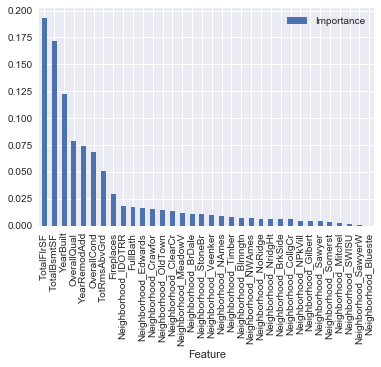

In [18]:
df = pd.DataFrame({'Feature':columns, 'Importance':clf.feature_importances_})
df = df.sort_values(by='Importance', ascending=False)
df.plot(x='Feature', y='Importance', kind='bar')

# Stacking

{'GradientBoostingRegressor': 0.05810558218958847, 'Ridge': 0.055854909615055806, 'RandomForestRegressor': 0.06514884400444916}


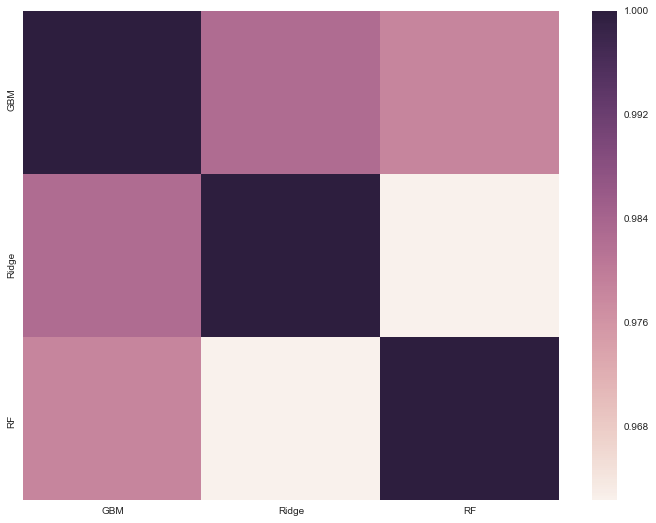

In [29]:
from sklearn.model_selection import train_test_split 

base_learner = [GradientBoostingRegressor(), Ridge(), RandomForestRegressor()]
meta_learner = KernelRidge()

cols = ['GBM', 'Ridge', 'RF']
kf = KFold(n_splits=5, random_state=0)
first_layer = {}
new_X_train = np.zeros((X_train.shape[0], len(base_learner)))
new_X_test = np.zeros((X_test.shape[0], len(base_learner)))
i = 0
for clf in base_learner:
    name = clf.__class__.__name__
    for (train_index, cv_index) in kf.split(X_train, Y_train):
        clf.fit(X_train[train_index], Y_train[train_index])
        predict = clf.predict(X_train[cv_index])
        acc = mean_squared_error(predict, Y_train[cv_index])
        predict_test = clf.predict(X_test)
        new_X_train[cv_index, i] = predict
        new_X_test[:, i] = new_X_test[:, i] + predict_test / 5.0
        if not name in first_layer:
            first_layer[name] = math.sqrt(acc) / 5.0
        else:
            first_layer[name] = first_layer[name] + math.sqrt(acc) / 5.0
    i += 1
    
print(first_layer)
df = pd.DataFrame(new_X_train, columns=cols)    
df.head()

cormap = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(cormap)

In [30]:
acc = 0.0
for (train_index, cv_index) in kf.split(new_X_train, Y_train):
    meta_learner.fit(new_X_train[train_index], Y_train[train_index])
    predict = meta_learner.predict(new_X_train[cv_index])
    acc += math.sqrt(mean_squared_error(Y_train[cv_index], predict))
acc /= 5.0
print(acc)

0.05497888038251116


In [21]:
result = meta_learner.predict(new_X_test)

submit = pd.DataFrame({'Id':Id, 'SalePrice':result})
submit['SalePrice'] = submit['SalePrice'].apply(lambda x: math.pow(10, x))
submit.to_csv('submit2.csv', index=False)
submit.head()

,Id,SalePrice
0,1461,131364.976340
1,1462,147828.599432
2,1463,171838.435084
3,1464,186257.046225
4,1465,201238.818607


# Hyperparameter searching

In [22]:
from sklearn.model_selection import GridSearchCV

param_test1 = {'n_estimators':range(20,250,10)}
clf = XGBRegressor()
gs = GridSearchCV(estimator=clf, param_grid=param_test1, scoring='neg_mean_squared_error', cv=5)
gs.fit(X_train, Y_train)

KeyboardInterrupt: 

In [ ]:
gs.cv_results_, gs.best_params_, gs.best_score_

In [ ]:
clf = XGBRegressor(n_estimators=170, eval_metric='rmse')
param_test2 = {'max_depth':range(2,9), 'min_child_weight':range(1,10)}
gs = GridSearchCV(estimator=clf, param_grid=param_test2, scoring='neg_mean_squared_error', cv=5)
gs.fit(X_train, Y_train)

In [ ]:
gs.best_params_, gs.best_score_

In [ ]:
clf = XGBRegressor(n_estimators=170, eval_metric='rmse', max_depth=3, min_child_weight=6)
param_test3 = {'gamma':[i/10.0 for i in range(5)]}
gs = GridSearchCV(estimator=clf, param_grid=param_test3, scoring='neg_mean_squared_error', cv=5)
gs.fit(X_train, Y_train)

In [ ]:
gs.best_params_, gs.best_score_

In [ ]:
clf = XGBRegressor(n_estimators=170, eval_metric='rmse', max_depth=3, min_child_weight=6)
param_test4 = {'subsample':[0.5,0.6,0.7,0.8,0.9,1.0], 'colsample_bytree':[0.2,0.3,0.4,0.5,0.6,0.7]}
gs = GridSearchCV(estimator=clf, param_grid=param_test4, scoring='neg_mean_squared_error', cv=5)
gs.fit(X_train, Y_train)

In [ ]:
gs.best_params_, gs.best_score_

In [ ]:
clf = XGBRegressor(n_estimators=170, eval_metric='rmse', max_depth=3, min_child_weight=6,\
                  subsample=0.9, colsample_bytree=0.5)
param_test5 = {'reg_alpha':[5e-6,1e-5,5e-5]}
gs = GridSearchCV(estimator=clf, param_grid=param_test5, scoring='neg_mean_squared_error', cv=5)
gs.fit(X_train, Y_train)

In [ ]:
gs.best_params_, gs.best_score_

In [ ]:
clf = XGBRegressor(learning_rate=0.01, eval_metric='rmse', max_depth=3, min_child_weight=6,\
                  subsample=0.9, colsample_bytree=0.5, reg_alpha=1e-5)
param_test6 = {'n_estimators':range(1900, 3000, 100)}
gs = GridSearchCV(estimator=clf, param_grid=param_test6, scoring='neg_mean_squared_error', cv=5)
gs.fit(X_train, Y_train)

In [ ]:
gs.best_params_, gs.best_score_

In [ ]:
clf = Ridge()
param_test1 = {'alpha':[0.01, 0.1, 1.0, 10.0, 100.0]}
gs = GridSearchCV(estimator=clf, param_grid=param_test1, scoring='neg_mean_squared_error', cv=5)
gs.fit(X_train, Y_train)

In [ ]:
gs.best_params_, gs.best_score_